# U.S. Medical Insurance Costs

In [675]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

from matplotlib import pyplot as plt
from scipy import stats
from decimal import *

In [676]:
insurance = pd.read_csv('insurance.csv')
print(insurance)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [677]:
with open('insurance.csv') as insurance_file:
    insurance_dictionary = csv.DictReader(insurance_file)
    #for row in insurance_dictionary:
        #print(row)
    
    def average_age(dictionary):
        num_list = [0]
        sum_age = 0
        for patient in dictionary:
            patient['age'] = int(patient['age']) 
            sum_age += patient['age']
            num_list.append(patient['age'])
        avg_age = sum_age / len(num_list)
        return print("The average patient age is {}.".format(avg_age))
    average_age(insurance_dictionary)

The average patient age is 39.177744585511576.


In [678]:
with open('insurance.csv') as insurance_file:
    insurance_dictionary = csv.DictReader(insurance_file)
    
    def region_list(dictionary):
        regions = []
        for patient in dictionary:
            if patient['region'] not in regions:
                regions.append(patient['region'])
        return regions
    regions = region_list(insurance_dictionary)
    print(regions)

['southwest', 'southeast', 'northwest', 'northeast']


In [679]:
with open('insurance.csv') as insurance_file:
    insurance_dictionary = csv.DictReader(insurance_file)
    
    def region_count(dictionary):
        southwest = 0
        southeast = 0
        northwest = 0
        northeast = 0
        for patient in dictionary: 
            if patient['region'] == 'southwest':
                southwest += 1
            elif patient['region'] == 'southeast':
                southeast += 1
            elif patient['region'] == 'northwest':
                northwest += 1
            elif patient['region'] == 'northeast':
                northeast += 1
        print("{} patients in the southwest region.".format(southwest))
        print("{} patients in the southeast region.".format(southeast))                    
        print("{} patients in the northwest region.".format(northwest))                    
        print("{} patients in the northeast region.".format(northeast))                    
    region_count(insurance_dictionary)

325 patients in the southwest region.
364 patients in the southeast region.
325 patients in the northwest region.
324 patients in the northeast region.


In [680]:
avg_age = insurance['age'].mean()
print("The average patient age is {}".format(avg_age))

The average patient age is 39.20702541106129


In [681]:
regions = insurance['region'].unique()
for region in regions:
    region_count = len(insurance[insurance['region'] == region])
    print("{} patients in the {} region.".format(region_count, region))
print(regions)

325 patients in the southwest region.
364 patients in the southeast region.
325 patients in the northwest region.
324 patients in the northeast region.
['southwest' 'southeast' 'northwest' 'northeast']


Average insurance cost for a smoker is 32050.23. 
Median insurance cost for a smoker is 34456.35. 
Average insurance costs for a non-smoker is 8434.27. 
Median insurance cost for a non-smoker is 7345.41. 


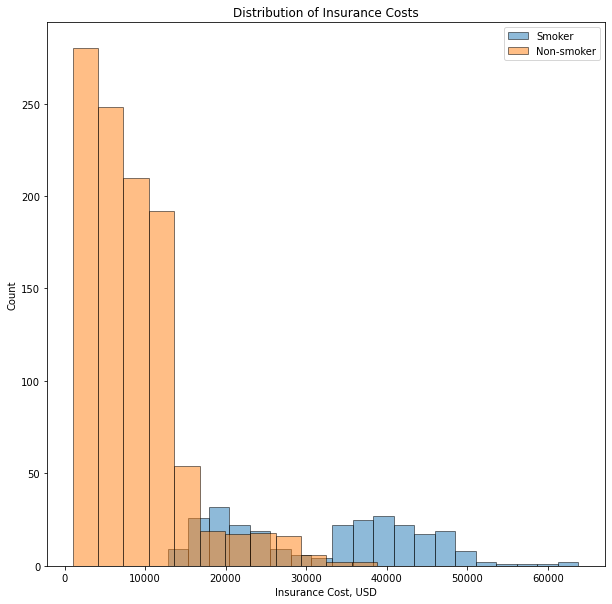

In [696]:
def smoker_analysis(df):
    # smoker
    smoker_insurance_data = df[df['smoker'] == 'yes']['charges']
    smoker_insurance_average = round(np.mean(smoker_insurance_data), 2)
    smoker_insurance_median = round(np.median(smoker_insurance_data), 2)
    smoker_insurance_range = np.amax(smoker_insurance_data) - np.amin(smoker_insurance_data)
    print("Average insurance cost for a smoker is {}. ".format(smoker_insurance_average))
    print("Median insurance cost for a smoker is {}. ".format(smoker_insurance_median))
    # print(smoker_insurance_range)
    
    # non-smoker
    nonsmoker_insurance_data = df[df['smoker'] == 'no']['charges']
    nonsmoker_insurance_average = round(nonsmoker_insurance_data.mean(), 2)
    nonsmoker_insurance_median = round(np.median(nonsmoker_insurance_data), 2)
    nonsmoker_insurance_range = np.amax(nonsmoker_insurance_data) - np.amin(nonsmoker_insurance_data)
    print("Average insurance costs for a non-smoker is {}. ".format(nonsmoker_insurance_average))
    print("Median insurance cost for a non-smoker is {}. ".format(nonsmoker_insurance_median))
    # print(nonsmoker_insurance_range)
    
    # plot
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.hist(smoker_insurance_data, bins = 20, alpha = 0.5, edgecolor='black')
    plt.hist(nonsmoker_insurance_data, range = (1000, 64000), bins = 20, alpha = 0.5, edgecolor='black')
    ax.legend(['Smoker', 'Non-smoker'])
    plt.xlabel('Insurance Cost, USD')
    plt.ylabel('Count')
    plt.title('Distribution of Insurance Costs')
    plt.show()

smoker_analysis(insurance)

Average age of insurance holders with children is 40.0
Average insurance cost for someone with children is 13949.94. 
Median insurance cost for someone with children is 9223.83. 
Average age of insurance holders with no children is 38.0
Average insurance cost for someone with no children is 12365.98. 
Median insurance cost for someone with no children is 9856.95. 


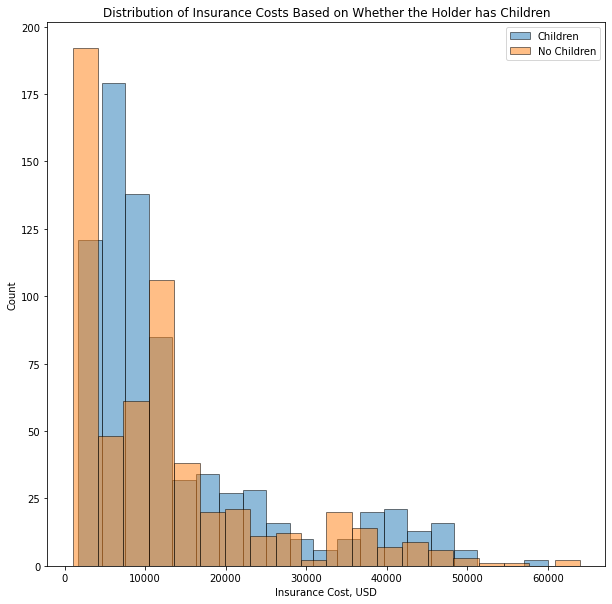

In [690]:
def child_analysis(df):
    # with children
    children_insurance_data = df[df['children'] != 0]['charges']
    children_insurance_average = round(np.mean(children_insurance_data), 2)
    children_insurance_median = round(np.median(children_insurance_data), 2)
    children_insurance_range = np.amax(children_insurance_data) - np.amin(children_insurance_data)
    children_age_holders = df[df['children'] != 0]['age']
    children_average_age_holders = round(np.mean(children_age_holders), 0)
    print("Average age of insurance holders with children is {}".format(children_average_age_holders))
    print("Average insurance cost for someone with children is {}. ".format(children_insurance_average))
    print("Median insurance cost for someone with children is {}. ".format(children_insurance_median))
    #print(children_insurance_range)
    
    # no children
    no_children_insurance_data = df[df['children'] == 0]['charges']
    no_children_insurance_average = round(np.mean(no_children_insurance_data), 2)
    no_children_insurance_median = round(np.median(no_children_insurance_data), 2)
    no_children_insurance_range = np.amax(no_children_insurance_data) - np.amin(no_children_insurance_data)
    no_children_age_holders = df[df['children'] == 0]['age']
    no_children_average_age_holders = round(np.mean(no_children_age_holders), 0)
    print("Average age of insurance holders with no children is {}".format(no_children_average_age_holders))
    print("Average insurance cost for someone with no children is {}. ".format(no_children_insurance_average))
    print("Median insurance cost for someone with no children is {}. ".format(no_children_insurance_median))
    # print(no_children_insurance_range)
    
    # plot Children vs. No Children
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.hist(children_insurance_data, bins = 20, alpha = 0.5, edgecolor='black', label='Children')
    plt.hist(no_children_insurance_data, range = (1000, 64000), bins = 20, alpha = 0.5, edgecolor='black', label='No Children')
    ax.legend()
    plt.xlabel('Insurance Cost, USD')
    plt.ylabel('Count')
    plt.title('Distribution of Insurance Costs Based on Whether the Holder has Children')
    plt.show()
     
child_analysis(insurance)

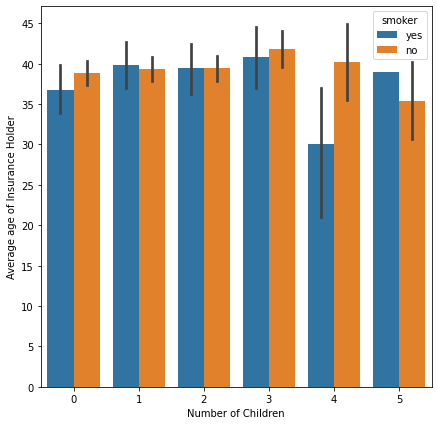

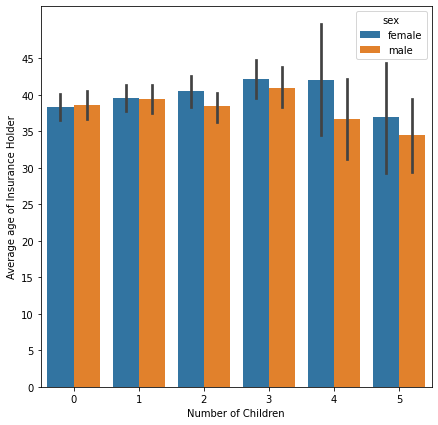

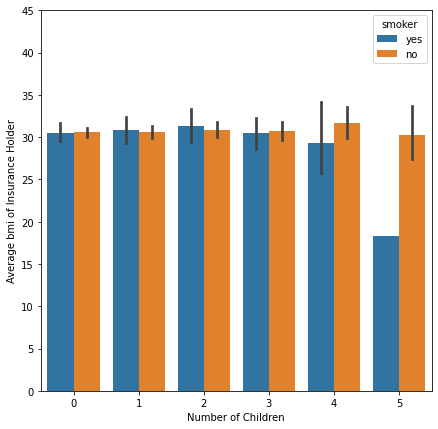

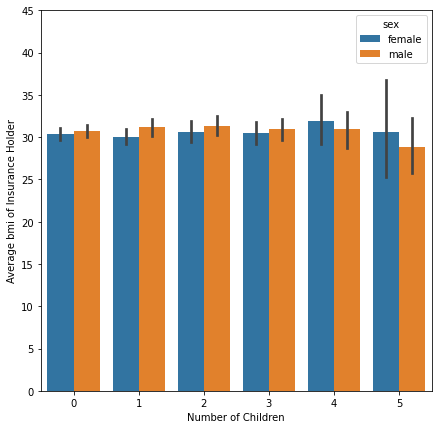

In [684]:
# change 'estimator' 
def barplot_analysis(df, dep_var, hue):
    max_num_children = np.amax(df['children'])
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.barplot(data = df, x = 'children', y = dep_var, hue = hue)
    ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
    plt.xlabel('Number of Children')
    plt.ylabel('Average {} of Insurance Holder'.format(dep_var))
    plt.show()
        
barplot_analysis(insurance, 'age', 'smoker')
barplot_analysis(insurance, 'age', 'sex')
barplot_analysis(insurance, 'bmi', 'smoker')
barplot_analysis(insurance, 'bmi', 'sex')

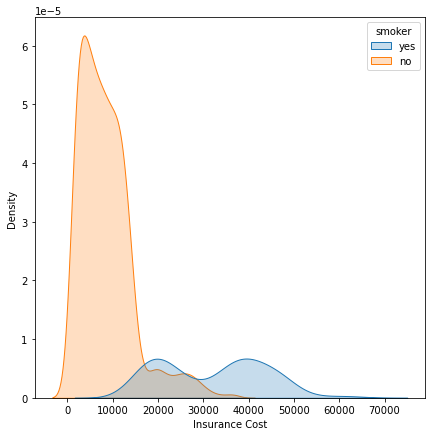

In [695]:
def kde_analysis(df):
    plt.subplots(figsize=(7, 7))
    sns.kdeplot(data = df, x = 'charges', shade = True, hue = 'smoker')
    plt.xlabel('Insurance Cost')
kde_analysis(insurance)